In [15]:
# Data needs to be cleaned more, this model can be used as a sample test
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from keras import models, layers, optimizers, regularizers

In [16]:
df = pd.read_csv("chicago_cleaned2.csv")

In [17]:
dropped = ['price', 'id']
X = df.drop(dropped, axis=1)
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [18]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

[05:08:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Training MSE: 0.1474
Validation MSE: 0.175

Training r2: 0.7449
Validation r2: 0.6734


In [19]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

,weight
time_since_last_review_nan,0.000000
review_scores_communication_nan,0.000000
outdoor_space,0.000000
review_scores_communication_9/10,0.000000
review_scores_communication_8/10,0.000000
...,...
review_scores_rating_nan,0.034329
gym,0.068388
bedrooms,0.122485
accommodates,0.131231


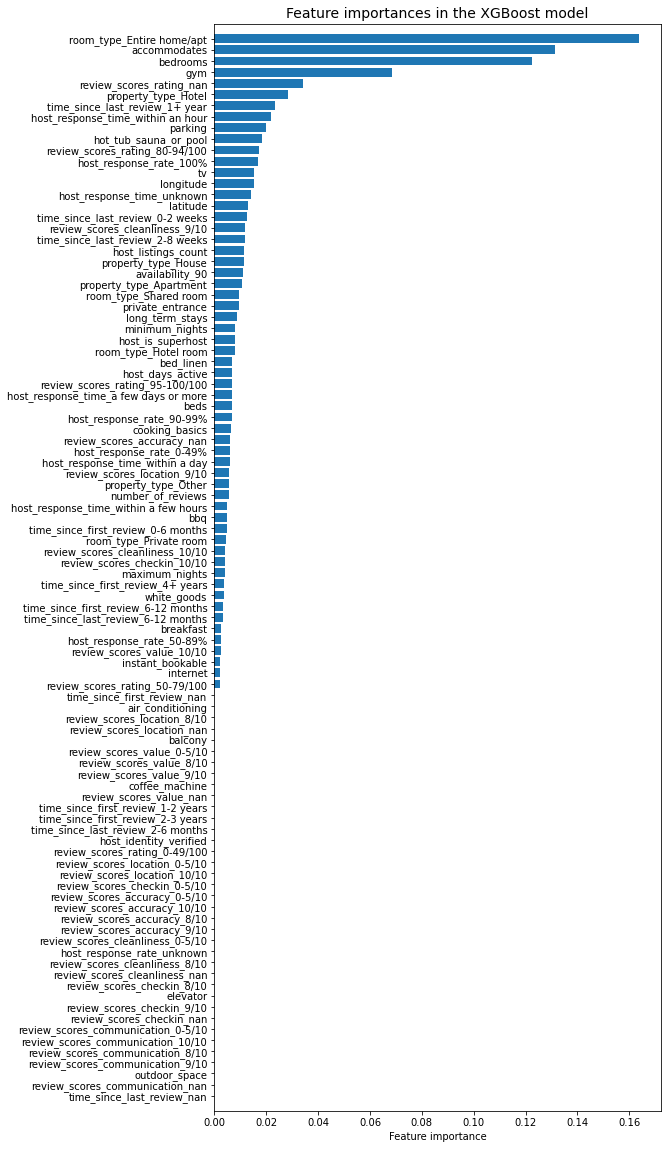

In [20]:
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

In [21]:
xgb_reg.save_model('chicago_model.bin')